In [17]:
from Run.load_agent import load_agent
from Agents.YourAgent import YourAgent
from Run.run_episode import run_episode
from pettingzoo.classic import connect_four_v3
from Run.run_N_episodes import run_N_episodes
from Agents.RandomAgent import RandomAgent
from Agents.QLearnerAgent import QLearner
from Run.test_agent import test_agent
import numpy
from tqdm import tqdm


In [24]:
env = connect_four_v3.env(render_mode='rgb_array')
env.reset()

0


In [15]:
def clean_q_values(agent):
    to_delete = list()
    for qval in tqdm(agent.q_values):
        if numpy.all(agent.q_values[qval] == numpy.zeros(7)):
            to_delete.append(qval)
    for to_del in to_delete:
        del agent.q_values[to_del] 

In [71]:
results_hyperparameters = dict()
# for gamma in [0.85,0.9,0.95,0.97,0.99]:
#     for lr in [0.05,0.1,0.15,0.2,0.5]:
for gamma in [0.75,0.8,0.85,0.9,0.95,0.97,0.99]:
    for lr in [0.05,0.1,0.15,0.2,0.5, 0.6, 0.7, 0.8]:
        possible_action = {0,1,2,3,4,5,6}
        agent = QLearner(possible_action, 
                        env.observation_space, 
                        gamma=gamma, 
                        lr=lr,
                        eps_init=.5, 
                        eps_min=1e-5,
                        eps_step=1-3,
                        name='Q-learning')
        agents = [agent,RandomAgent(env, possible_action, env.observation_space)]
        run_N_episodes(env, agents, N_episodes=1000)
        clean_q_values(agent)
        results_hyperparameters[(gamma, lr)] = len(agent.q_values)
        print(len(agent.q_values))


 36%|███▌      | 362/1000 [00:06<00:11, 54.53it/s]


KeyboardInterrupt: 

In [56]:
print(len(results_hyperparameters))

56


In [26]:
clean_q_values(agent)


100%|██████████| 162338/162338 [00:05<00:00, 27244.24it/s]


In [63]:
#print(results_hyperparameters)
x, y, z = [0.75,0.8,0.85,0.9,0.95,0.97,0.99], [0.05,0.1,0.15,0.2,0.5, 0.6, 0.7, 0.8], list()

for lr in y:
    list_inter = list()
    for gamma in x:
        list_inter.append(results_hyperparameters[(gamma, lr)])
    z.append(list_inter)

In [64]:
Z = numpy.array(z)

In [65]:
Z

array([[1550, 1547, 1562, 1532, 1521, 1536, 1550],
       [1579, 1537, 1537, 1588, 1535, 1527, 1554],
       [1534, 1534, 1545, 1575, 1539, 1580, 1527],
       [1525, 1543, 1536, 1550, 1554, 1538, 1563],
       [1531, 1552, 1570, 1542, 1544, 1513, 1560],
       [1555, 1534, 1543, 1553, 1542, 1556, 1568],
       [1530, 1550, 1524, 1563, 1527, 1537, 1543],
       [1537, 1563, 1535, 1567, 1523, 1571, 1557]])

[[0.75 0.8  0.85 0.9  0.95 0.97 0.99]
 [0.75 0.8  0.85 0.9  0.95 0.97 0.99]
 [0.75 0.8  0.85 0.9  0.95 0.97 0.99]
 [0.75 0.8  0.85 0.9  0.95 0.97 0.99]
 [0.75 0.8  0.85 0.9  0.95 0.97 0.99]
 [0.75 0.8  0.85 0.9  0.95 0.97 0.99]
 [0.75 0.8  0.85 0.9  0.95 0.97 0.99]
 [0.75 0.8  0.85 0.9  0.95 0.97 0.99]]
[[0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.1  0.1  0.1  0.1  0.1  0.1  0.1 ]
 [0.15 0.15 0.15 0.15 0.15 0.15 0.15]
 [0.2  0.2  0.2  0.2  0.2  0.2  0.2 ]
 [0.5  0.5  0.5  0.5  0.5  0.5  0.5 ]
 [0.6  0.6  0.6  0.6  0.6  0.6  0.6 ]
 [0.7  0.7  0.7  0.7  0.7  0.7  0.7 ]
 [0.8  0.8  0.8  0.8  0.8  0.8  0.8 ]]


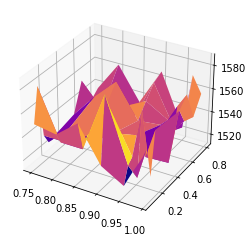

In [66]:
import matplotlib.pyplot as plt


X, Y = numpy.meshgrid(x, y)
print(X)

print(Y)
# Résultat : tableau numpy 2D
 
# Affichage de la surface
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')

In [68]:
import operator

max_key = max(results_hyperparameters.items(), key=operator.itemgetter(1))[0]
print(max_key)

(0.9, 0.1)


In [69]:
results_hyperparameters[max_key]

1588

  0%|          | 0/1000 [00:00<?, ?it/s]


TypeError: get_action() takes 2 positional arguments but 3 were given